In [1]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
!pip install pycaret

In [5]:
from pycaret.classification import *

In [6]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [8]:
clf1 = setup(data = train,
             target = 'risk_flag',
             numeric_imputation = 'mean',
             categorical_features = ['married', 'house_ownership','car_ownership','profession', 'city', 'state' ],
             silent = True)

,Description,Value
0,session_id,4058
1,Target,risk_flag
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(252000, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8993,0.9380,0.5280,0.6051,0.5638,0.5072,0.5088,145.996
et,Extra Trees Classifier,0.8984,0.9377,0.5078,0.6053,0.5522,0.4954,0.4979,215.178
knn,K Neighbors Classifier,0.8896,0.8733,0.5065,0.5576,0.5308,0.4684,0.4691,20.483
dt,Decision Tree Classifier,0.8858,0.8524,0.5467,0.5364,0.5414,0.4762,0.4763,47.965
lightgbm,Light Gradient Boosting Machine,0.8783,0.8225,0.0220,0.7208,0.0426,0.0356,0.1111,2.710
gbc,Gradient Boosting Classifier,0.8770,0.6441,0.0032,0.8288,0.0063,0.0053,0.0442,132.407
ada,Ada Boost Classifier,0.8768,0.5965,0.0011,0.8167,0.0022,0.0019,0.0269,28.733
lr,Logistic Regression,0.8767,0.5024,0.0000,0.0000,0.0000,0.0000,0.0000,3.309
nb,Naive Bayes,0.8767,0.5125,0.0000,0.0000,0.0000,0.0000,0.0000,0.885
svm,SVM - Linear Kernel,0.8767,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,80.768


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False)

In [10]:
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8975,0.9376,0.5324,0.5942,0.5616,0.5038,0.5047
1,0.8999,0.9394,0.5366,0.6065,0.5694,0.5130,0.5143
2,0.9042,0.9413,0.5343,0.6319,0.5790,0.5253,0.5277
3,0.9009,0.9389,0.5310,0.6131,0.5691,0.5134,0.5151
4,0.8952,0.9339,0.5237,0.5838,0.5521,0.4930,0.4939
5,0.8994,0.9379,0.5283,0.6054,0.5642,0.5076,0.5091
6,0.8959,0.9379,0.5140,0.5894,0.5491,0.4906,0.4921
7,0.8998,0.9386,0.5326,0.6071,0.5674,0.5111,0.5125
8,0.8999,0.9362,0.5354,0.6071,0.5690,0.5126,0.5139
9,0.8999,0.9387,0.5113,0.6130,0.5575,0.5016,0.5043


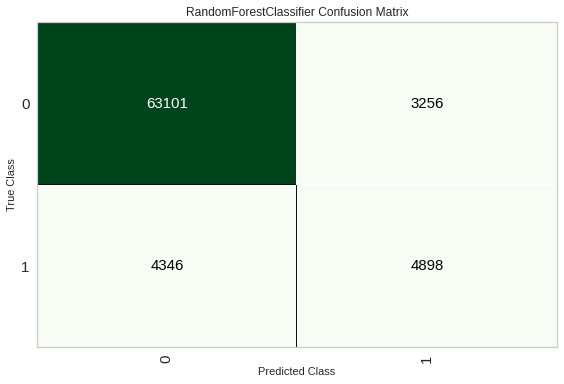

In [11]:
plot_model(estimator = random_forest,plot = 'confusion_matrix')

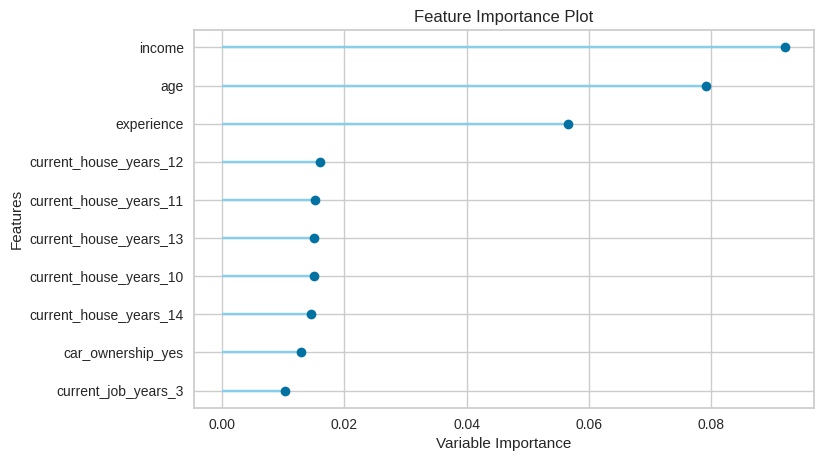

In [12]:
plot_model(estimator = random_forest,plot = 'feature')

In [15]:
evaluate_model(random_forest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
predictions = predict_model(random_forest, data = test)
predictions.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,Label,Score
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,0,0.9564
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0,1.0000
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,0,1.0000
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0,0.8290
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,0,0.9292


In [49]:
sub = pd.read_csv('Sample Prediction Dataset.csv')

In [52]:
sub.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [47]:
sub['risk_flag'] = round(predictions['Score']).astype(int)

In [50]:
sub.head()
sub.tail()

,id,risk_flag
27995,27996,0
27996,27997,1
27997,27998,0
27998,27999,0
27999,28000,0


In [51]:
# sub = pd.DataFrame(predictions['Label'],columns = ['risk_flag'],index = [i+1 for i in range(test.shape[0])])
# sub = pd.DataFrame( columns = ['risk_flag'], index = [i+1 for i in range(test.shape[0])] )
# sub.index.name = 'id'
sub.to_csv('pycaret.csv', index = False)
sub.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [ ]:
sub.to_csv('pycaret_rf.csv', index = False)